In [1]:
from matplotlib import pyplot as plt
import numpy as np
#TODO make separate notebooks for each system

In [2]:
#uncomment this block for HeH+
sys = 'heh+'
c0hf = 0.9625707
c1hf = -0.13322676E-14 
c2hf = -0.2691179
c3hf = 0.0321435

c2b1b0 = 0.1903932
c2b1b1 = 0.70710678
c2b1b2 = 0.6809922 
c2b1b3 = 0.0000088

c2a1a0 = c2b1b0
c2a1a1 = -0.70710678 
c2a1a2 = c2b1b2
c2a1a3 = c2b1b3

c22110 = -0.0309597 
c22111 = 0.57112365E-16
c22112 = 0.0086428
c22113 = 0.9994833

In [3]:
# #uncomment this block for HeH+
# sys = 'heh+'
# c0hf = 0.9625707
# c1hf = -0.2691179
# c2hf = 0.0321435
# c2b1b0 = 0.1903932
# c2b1b1 = 0.6809922 
# c2b1b2 = 0.0000088
# c2a1a0 = c2b1b0
# c2a1a1 = c2b1b1
# c2a1a2 = c2b1b2
# c22110 = -0.0309597 
# c22111 = 0.0086428
# c22112 = 0.999483

In [4]:
# #uncomment this block for H2
# sys = 'h2'
# c0hf = 0.99364675
# c1hf = 0.66613381E-15
# c2hf = 0.11254389

# c2b1b0 = -0.21448983E-15
# c2b1b1 = 0.70710678 
# c2b1b2 = -0.93431708E-16

# c2a1a0 = 0.11102230E-14
# c2a1a1 = 0.70710678
# c2a1a2 = -0.18041124E-15

# c22110 = -0.11254389 
# c22111 =  0.26197948E-15
# c22112 = 0.99364675  

In [5]:
#form basis and dictionary of CI coefficients
phi1 = np.array([1,0]).reshape((2,1))
phi2 = np.array([0, 1]).reshape((2,1))
chf = {0: c0hf, 1: c1hf, 2:  c2hf , 3: c3hf}
c2b1b = {0: c2b1b0, 1: c2b1b1, 2:  c2b1b2, 3: c2b1b3}
c2a1a = {0: c2a1a0, 1: c2a1a1, 2:  c2a1a2, 3: c2a1a3}
c2211 = {0: c22110, 1: c22111, 2:  c22112, 3: c22113}

In [6]:
# #form basis and dictionary of CI coefficients
# phi1 = np.array([1,0]).reshape((2,1))
# phi2 = np.array([0, 1]).reshape((2,1))
# chf = {0: c0hf, 1: c1hf, 2:  c2hf}
# c2b1b = {0: c2b1b0, 1: c2b1b1, 2:  c2b1b2}
# c2a1a = {0: c2a1a0, 1: c2a1a1, 2:  c2a1a2}
# c2211 = {0: c22110, 1: c22111, 2:  c22112}

In [7]:
#this loads in the AO basis data saved to disk from Gaussian
# tran_den_mat = {}
# for i in range(0,3):
#     for j in range(i,3):
#         tran_den_mat[str(i)+str(j)] = np.load('denmat_ci/dens_ci_'+str(i)+'_'+str(j)+'_AO.npz')['arr_0']
# tran_den_mat['10'] = tran_den_mat['01']
# tran_den_mat['20'] = tran_den_mat['02']
# tran_den_mat['21'] = tran_den_mat['12']
# tran_den_mat

In [8]:
tens = np.zeros((4,4,2,2))
for i in range(0,4):
    for j in range(0,4):
        tens [i,j,:,:] = 2 * (chf[i]*chf[j] *(phi1 @phi1.T) + (1/2)*c2a1a[i]*c2a1a[j]*(phi1 @phi1.T + phi2 @phi2.T) 
                                           +(1/2) * c2b1b[i]*c2b1b[j]*(phi1 @phi1.T + phi2 @phi2.T) + c2211[i]*c2211[j]*(phi2 @phi2.T)
                                          +(1/2) * (chf[i]*c2a1a[j] * (phi1 @ phi2.T) + c2a1a[i]*chf[j]*(phi2 @ phi1.T))
                                          -(1/2) * (chf[i]*c2b1b[j] * (phi1 @ phi2.T) + c2b1b[i]*chf[j]*(phi2 @ phi1.T))
                                          -(1/2) * (c2a1a[i]*c2211[j] * (phi1 @ phi2.T) + c2211[i]*c2a1a[j]*(phi2 @ phi1.T))
                                          +(1/2) * (c2b1b[i]*c2211[j] * (phi1 @ phi2.T) + c2211[i]*c2b1b[j]*(phi2 @ phi1.T)))
        print('TRACE: ',np.trace(tens [i,j,:,:]),str(i)+str(j))
    
tens
#can compare this MO -> AO with saved Gaussian

TRACE:  1.99999999347012 00
TRACE:  -2.557049320011241e-15 01
TRACE:  -3.122922009879403e-08 02
TRACE:  7.818552000271595e-08 03
TRACE:  -2.557049320011241e-15 10
TRACE:  1.9999999932878738 11
TRACE:  7.226321875027958e-16 12
TRACE:  2.851797362039041e-17 13
TRACE:  -3.122922009879403e-08 20
TRACE:  7.226321875027958e-16 21
TRACE:  1.99999979002786 22
TRACE:  -1.429813799962154e-07 23
TRACE:  7.818552000271595e-08 30
TRACE:  2.851797362039041e-17 31
TRACE:  -1.429813799962154e-07 32
TRACE:  2.00000014345204 33


array([[[[ 1.92558385e+00,  0.00000000e+00],
         [ 0.00000000e+00,  7.44161473e-02]],

        [[-2.55351296e-15, -1.36128054e+00],
         [-4.37836276e-02, -3.53636337e-18]],

        [[-2.58777443e-01,  0.00000000e+00],
         [ 0.00000000e+00,  2.58777411e-01]],

        [[ 6.18841335e-02,  0.00000000e+00],
         [ 0.00000000e+00, -6.18840553e-02]]],


       [[[-2.55351296e-15, -4.37836276e-02],
         [-1.36128054e+00, -3.53636337e-18]],

        [[ 9.99999997e-01,  1.96487999e-15],
         [ 1.96487999e-15,  9.99999997e-01]],

        [[ 7.21644966e-16,  1.22227650e-02],
         [ 3.80590183e-01,  9.87221496e-19]],

        [[-8.56477365e-17,  1.41348284e+00],
         [-4.54577736e-02,  1.14165710e-16]]],


       [[[-2.58777443e-01,  0.00000000e+00],
         [ 0.00000000e+00,  2.58777411e-01]],

        [[ 7.21644966e-16,  3.80590183e-01],
         [ 1.22227650e-02,  9.87221496e-19]],

        [[ 1.07234964e+00,  0.00000000e+00],
         [ 0.00000000e+00,  9.2

In [9]:
full_den_mats = np.load(sys+'/td_dens_tdcasscf_'+sys+'_sto-3g_046_dt=0.082680au.npz',allow_pickle=True)
full_den_mats.files

['td_dens_im_data', 'td_dens_re_data']

In [10]:
full_den_mats = full_den_mats['td_dens_re_data'] + 1j*full_den_mats['td_dens_im_data']
full_den_mats.shape

(20073, 2, 2)

In [11]:
# C = np.load('denmat_ci_H2/ke+en+overlap+ee_twoe+dip_casscf22_h2_sto-3g.npz')['cMO_colvec_data']
# S = np.load('denmat_ci_H2/ke+en+overlap+ee_twoe+dip_casscf22_h2_sto-3g.npz')['overlap_data']

In [12]:
time_coeffs = np.loadtxt(sys+'/time_coeffs.tdcasscf_'+sys+'_sto-3g_046_dt=0.082680au.txt',dtype=np.cdouble)
time_coeffs.shape

(20071, 5)

In [13]:
#deletes time column 
time_coeffs = np.delete(time_coeffs,0,1)

In [14]:
#ensuring normalization
np.sum(np.square(np.abs(time_coeffs)),axis=1)

array([1.        , 1.00000001, 0.99999999, ..., 1.        , 1.        ,
       1.        ])

In [15]:
#deletes 0 coefficient column
time_coeffs2 = np.delete(time_coeffs,1,1)

[1.         1.00000001 0.99999999 ... 1.         1.         1.        ]


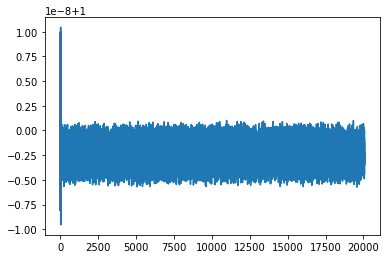

In [16]:
#ensuring normalization
print(np.sum(np.abs(np.square(time_coeffs2)),axis=1))
plt.plot(np.arange(0,time_coeffs2.shape[0]),np.sum(np.abs(np.square(time_coeffs2)),axis=1));

In [20]:
vals = []
for i in range(time_coeffs2.shape[0]):
    x = np.random.normal(size=4) + 1j*np.random.normal(size=4)
    x /= np.sqrt(np.sum(np.abs(x)**2))
    vals.append(x)
vals = np.array(vals)
time_coeffs2 = vals
np.max((np.sum(np.abs(np.square(vals)),axis=1))), np.min((np.sum(np.abs(np.square(vals)),axis=1)))

(1.0000000000000007, 0.9999999999999993)

In [21]:
#this is the training data for MMUT ()
rdmMO = np.einsum('ni,nj,ijab->nab',vals, np.conjugate(vals), tens)
for j in range(0,200,10):
    print(rdmMO[j])
    print()

[[ 0.87164715+8.67361738e-19j -0.19606976-3.35278989e-01j]
 [-0.19606976+3.35278989e-01j  1.12835282+2.38524478e-18j]]

[[1.27700265+1.62630326e-19j 0.5180247 +1.89280227e-01j]
 [0.5180247 -1.89280227e-01j 0.72299731-2.22261445e-18j]]

[[1.82252023-5.36680075e-18j 0.17048499+3.80856789e-01j]
 [0.17048499-3.80856789e-01j 0.17747974-8.13151629e-19j]]

[[ 0.95791157+2.16840434e-19j -0.17612454-2.34320657e-01j]
 [-0.17612454+2.34320657e-01j  1.04208831+1.73472348e-18j]]

[[ 0.57226897-1.08420217e-19j -0.03944976+3.43018664e-01j]
 [-0.03944976-3.43018664e-01j  1.42773122-1.08420217e-19j]]

[[ 1.39021384+1.09775470e-17j -0.1696033 +3.12915473e-01j]
 [-0.1696033 -3.12915473e-01j  0.60978626+3.93023288e-18j]]

[[ 0.86872463+0.00000000e+00j -0.03651242-2.10043773e-02j]
 [-0.03651242+2.10043773e-02j  1.13127525-1.73472348e-18j]]

[[ 0.74851146+4.33680869e-18j -0.29758493-2.02909837e-01j]
 [-0.29758493+2.02909837e-01j  1.25148858+6.07153217e-18j]]

[[ 1.48579865+2.16840434e-19j -0.24631276-2.0723

(2.0000002129182346-1.748276003132876e-18j) (1.9999997461594536+7.589415207398531e-19j)


C:\Users\Hardeep\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


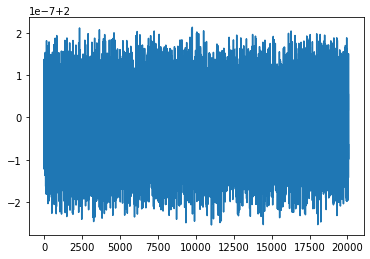

In [19]:
traces = np.einsum('ijj ->i',rdmMO)
print(np.max(traces),np.min(traces))
plt.plot(np.arange(0,vals.shape[0]),traces);